In [ ]:
# # setup for the colab
# !pip install imageio
# !pip install torch
# !pip install kaggle
# # upload kaggle.json for data downloading
# from google.colab import files
# files.upload()
# !mkdir -p ~/.kaggle
# !mv kaggle.json ~/.kaggle
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle competitions download -c tgs-salt-identification-challenge
# !mkdir -p test
# !mkdir -p train
# !unzip test.zip -d test
# !unzip train.zip -d train

In [226]:
import os
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imageio
from skimage.transform import resize

In [227]:
HEIGHT, WIDTH = 101, 101

In [249]:
root_path = './'
train_path = os.path.join(root_path, "train")

def get_image(file_id):
    image_path = os.path.join(train_path, "images", file_id + '.png')
    image = np.array(imageio.imread(image_path), dtype=np.uint8)
    return image

def get_mask(file_id):
    mask_path = os.path.join(train_path, "masks", file_id + '.png')
    mask = np.array(imageio.imread(mask_path), dtype=np.uint8)
    return mask


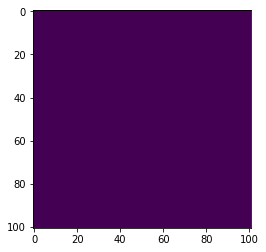

In [250]:
train_values = pd.read_csv('train.csv')
file_list = list(train_values['id'])

In [251]:
def rle_to_mask(rle_string):
    if isinstance(rle_string, float) and np.isnan(rle_string):
        return np.zeros((HEIGHT, WIDTH)) 
    rle_numbers = [int(num) for num in rle_string.split()] 
    rle_pairs = np.array(rle_numbers).reshape((-1, 2))
    
    mask = np.zeros(HEIGHT*WIDTH)
    for start, length in rle_pairs:
        mask[start-1: start-1+length] = 255
    
    mask = mask.reshape((HEIGHT, WIDTH)).T
        
    return mask


324 is correct:  True
406 is correct:  True
3637 is correct:  True
3808 is correct:  True
2245 is correct:  True
458 is correct:  True
1245 is correct:  True
2624 is correct:  True
568 is correct:  True
410 is correct:  True
757 is correct:  True
1472 is correct:  True
1532 is correct:  True
3441 is correct:  True
2475 is correct:  True


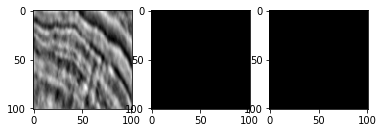

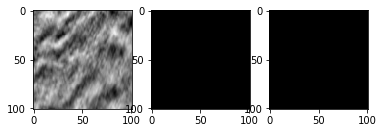

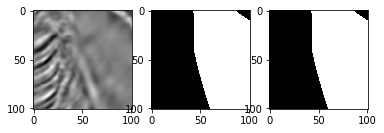

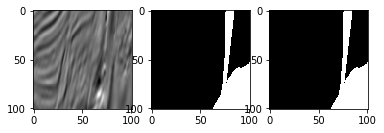

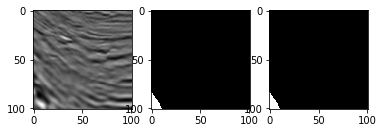

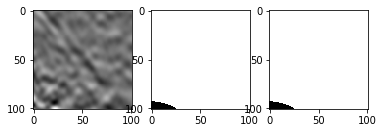

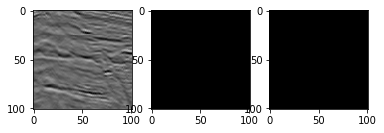

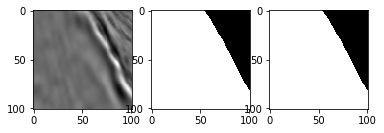

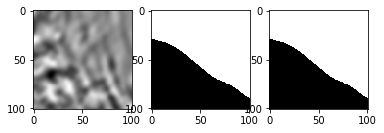

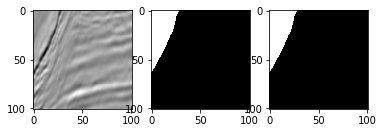

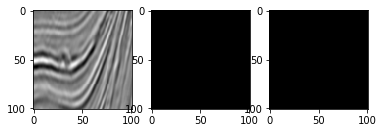

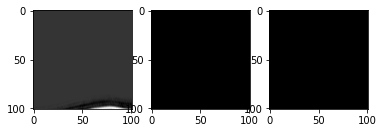

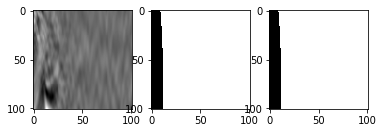

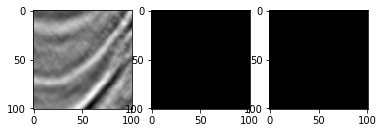

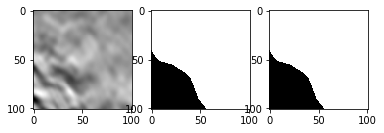

In [253]:
# check if masks correctly oriented
for _ in range(15):
    i = random.randint(0, len(dataset)-1) 
    file_id = file_list[i]
    image, mask = get_image(file_id), get_mask(file_id)
    f, axarr = plt.subplots(1, 3)
    axarr[0].imshow(image)
    axarr[1].imshow(mask, cmap='gray')
    axarr[2].imshow(rle_to_mask(train_values['rle_mask'][i]), cmap='gray')
    print(i, 'is correct: ', (mask==rle_to_mask(train_values['rle_mask'][i])).all())
    

(array([ 14.,  28.,  42.,  58.,  43.,  60.,  42.,  51.,  65.,  72.,  65.,
         74.,  70.,  85.,  88.,  95.,  95.,  89., 110.,  88., 114., 114.,
        128., 125., 125., 119., 118., 127., 110., 130., 108., 122., 102.,
        119., 113., 119., 106.,  84.,  84.,  72.,  80.,  87.,  65.,  80.,
         18.,  27.,  13.,  15.,  13.,  29.]),
 array([ 51.  ,  69.16,  87.32, 105.48, 123.64, 141.8 , 159.96, 178.12,
        196.28, 214.44, 232.6 , 250.76, 268.92, 287.08, 305.24, 323.4 ,
        341.56, 359.72, 377.88, 396.04, 414.2 , 432.36, 450.52, 468.68,
        486.84, 505.  , 523.16, 541.32, 559.48, 577.64, 595.8 , 613.96,
        632.12, 650.28, 668.44, 686.6 , 704.76, 722.92, 741.08, 759.24,
        777.4 , 795.56, 813.72, 831.88, 850.04, 868.2 , 886.36, 904.52,
        922.68, 940.84, 959.  ]),
 <a list of 50 Patch objects>)

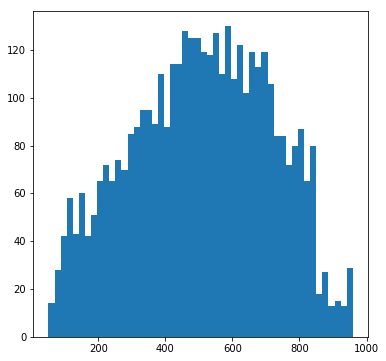

In [254]:
pixels = float(HEIGHT*WIDTH)
depths = pd.read_csv("depths.csv")

train_values['depths'] = depths['z']

plt.figure(figsize=(6, 6))
plt.hist(train_values['depths'], bins=50)


In [255]:
norm = HEIGHT * WIDTH * 255.0
def salt_concentration(mask):
    return np.sum(mask)/norm

masks = [get_mask(file_id) for file_id in train_values['id']]
train_values['salt_concentration'] = [salt_concentration(mask) for mask in masks]

In [257]:
train_val = train_values.merge(depths, how='left')

Text(0.5, 1.0, 'Depths vs salt concentration')

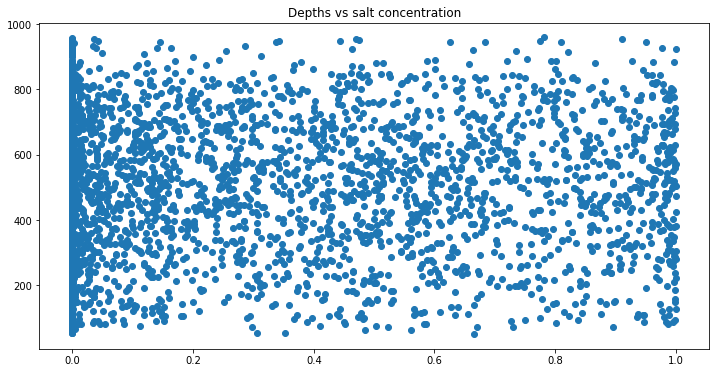

In [258]:
plt.figure(figsize=(12, 6))
plt.scatter(train_val['salt_concentration'], train_val['depths'])
plt.title("Depths vs salt concentration")

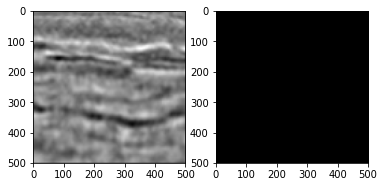

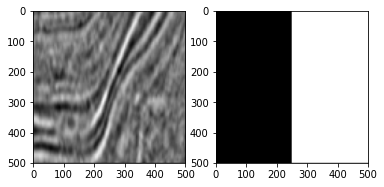

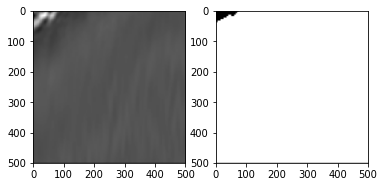

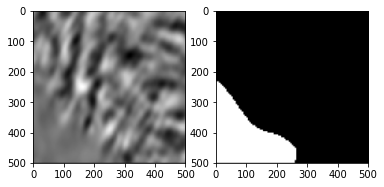

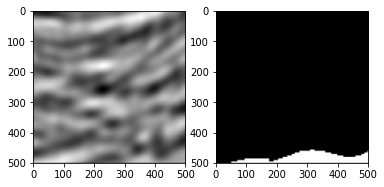

In [277]:
# what to do
# resize to 128x128
# make 4 layers with conv-deconv
# train on that, check performance
# postprocess
# split train, validation
# subset
# more layers
# add features
# full set
# normalize
# subset

im_resize = (128, 128)

def get_resize(img):
    return resize(img, (500, 500), mode='constant', anti_aliasing=False)

for i, file_id in enumerate(file_list[:5]):
    image = get_resize(get_image(file_id))
    mask = get_resize(get_image(file_id))
    _, axarr = plt.subplots(1, 2)
    
    axarr[0].imshow(image)
    axarr[1].imshow(mask, cmap='gray')
